# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [16]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [18]:
#  1. Get the total rides for each city type
#set city has the index
rides_by_type = pyber_data_df.set_index(["type"])["ride_id"]

#rides_by_city
#use the groupby on city to count riders
total_rides = rides_by_type.groupby(["type"]).count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [19]:
# 2. Get the total drivers for each city type
#set city has the index
drivers_by_type = city_data_df.set_index(["type"])["driver_count"]
#drivers_by_city

#use the groupby on city to sum drivers
total_drivers = drivers_by_type.groupby(["type"]).sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [20]:
#  3. Get the total amount of fares for each city type
#set city has the index
fares_by_type = pyber_data_df.set_index(["type"])["fare"]
#fares_by_city

#use the groupby on city to sum fares
total_fares = fares_by_type.groupby(["type"]).sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [22]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [23]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
        "Total Rides": total_rides,
        "Total Drivers": total_drivers,
        "Total Fares": total_fares,
        "Average Fare per Ride": average_fare_per_ride,
        "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [24]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [25]:
#  8. Format the columns.

#Format the "Total Rides" to have comma for a thousand separator
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
#Format the "Total Drivers" to have comma for a thousand separator
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
#format the "Total Fares" to have a dollar sign, comma and two decimal places
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
#format the "Average Fare per Ride" to one decimal places
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
#format the "Average Fare per Driver" to one decimal places
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [26]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
total_fares_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [27]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_df = total_fares_df.reset_index()
total_fares_df

,index,type,fare
0,0,Rural,4327.93
1,1,Suburban,19356.33
2,2,Urban,39854.38


In [28]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_df = pd.pivot_table(total_fares_df, values="fare", index=["date"], columns=["type"], aggfunc=np.sum)
total_fares_df                              


KeyError: 'date'

In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#year_gender_df=gender_pivot_df.loc['2015-01-01':'2015-12-31']
total_fares_df=total_fares_df.loc['2019-01-01':'2019-04-28']
total_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#df.index = pd.to_datetime(df.index)
total_fares_df.index=pd.to_datetime(total_fares_df.index)

In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df=total_fares_df.resample("w").count()
weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88
2019-02-10,4,31,94
2019-02-17,3,34,86
2019-02-24,11,43,103
2019-03-03,5,30,88


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

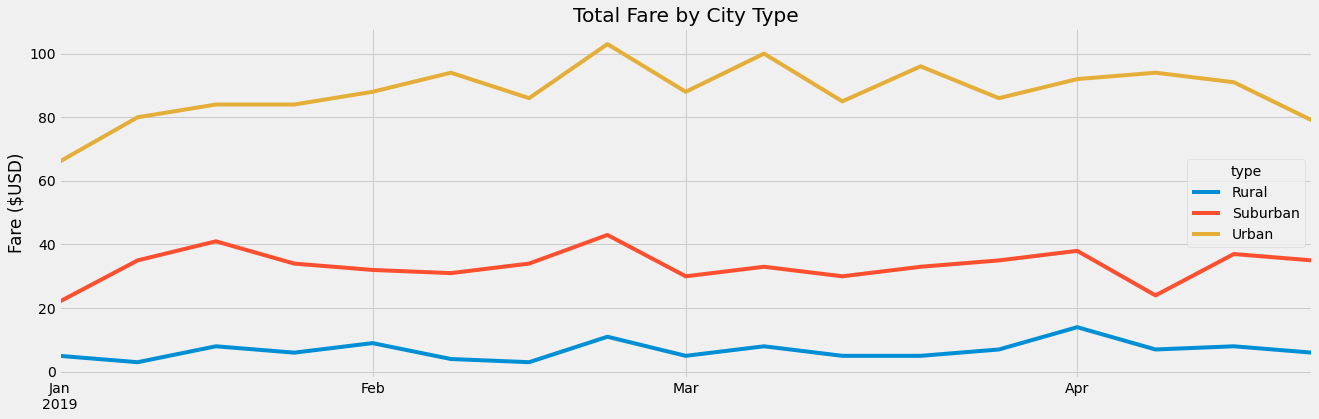

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_rides = weekly_df.plot(figsize = (20,6))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#Add a title
weekly_rides.set_title("Total Fare by City Type")
#Add a x- and y-axis
weekly_rides.set_xlabel("")
weekly_rides.set_ylabel("Fare ($USD)")

# Save Figure
plt.savefig("analysis/FigChallenge.png")

#plt.plot
plt.scatter

